<a href="https://colab.research.google.com/github/Sushrut-Patil/Analysis-of-Sample-SuperStore-Dataset/blob/main/Analysis_of_SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

Objective : To Study the Sample SuperStore DataSet and Find Valuable Insights.


# Importing Libraries

First, we will start by importing the important libraries that we will use throughout our analysis. These libraries include Pandas for data manipulation and analysis, Numpy for numerical computing, Matplotlib for data visualization.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading DataSet




Next, we will import our DataSet file using pandas.readcsv() function

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SampleSuperstore.csv")

**Dimensions of Data**

In [8]:
df.shape

(9994, 21)

**Peek at DataSet**

In [9]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Info about Data**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Data Cleaning
1) Deleting columns which are not necessary for Analysis like RowID, ColumnID, CustomerID, Name etc.

In [11]:
cols_to_select = [4,7,10,12] + [14,15] + list(range(17,21))
df = df.iloc[:, cols_to_select]
df.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


2) To check if Any values are missing from DataSet.

In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

3) Ensuring Data Types for Numbers are correct to perform Analysis.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   State         9994 non-null   object 
 3   Region        9994 non-null   object 
 4   Category      9994 non-null   object 
 5   Sub-Category  9994 non-null   object 
 6   Sales         9994 non-null   float64
 7   Quantity      9994 non-null   int64  
 8   Discount      9994 non-null   float64
 9   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 780.9+ KB


4) Dropping Duplicate values

In [14]:
df.duplicated().sum()

137

In [15]:
df = df.drop_duplicates()

# Stastical Summary of Dataset

In [16]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9857.000000,9857.000000,9857.000000,9857.000000
mean,231.802578,3.800954,0.156710,28.859913
std,626.930390,2.233196,0.207046,235.825762
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.460000,2.000000,0.000000,1.689600
50%,55.480000,3.000000,0.200000,8.685500
75%,210.980000,5.000000,0.200000,29.692000
max,22638.480000,14.000000,0.800000,8399.976000


correaltion among columns

In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200291,-0.029292,0.479001
Quantity,0.200291,1.000000,0.008010,0.066023
Discount,-0.029292,0.008010,1.000000,-0.220436
Profit,0.479001,0.066023,-0.220436,1.000000


# Summary of Data and Visualization

Shipment wise Distribution of orders

Text(0.5, 1.0, 'Number of Orders by Preferred Mode of Shipment')

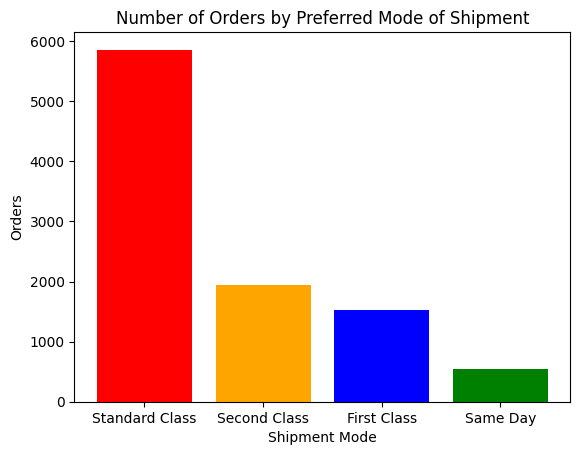

In [18]:
value_counts = df["Ship Mode"].value_counts()
colors = ['red','orange', 'blue' ,'green']
plt.bar(value_counts.index,value_counts.values,color=colors)
plt.ylabel('Orders')
plt.xlabel('Shipment Mode')
plt.title('Number of Orders by Preferred Mode of Shipment')

Region wise Distribution of Orders

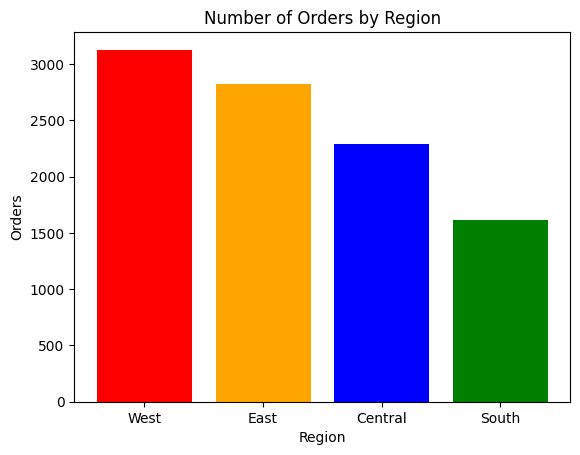

In [19]:
value_counts = df['Region'].value_counts()
plt.bar(value_counts.index, value_counts.values,color=colors)
plt.xlabel('Region')
plt.ylabel('Orders')
plt.title('Number of Orders by Region')
plt.show()


Statewise Distribution of Orders

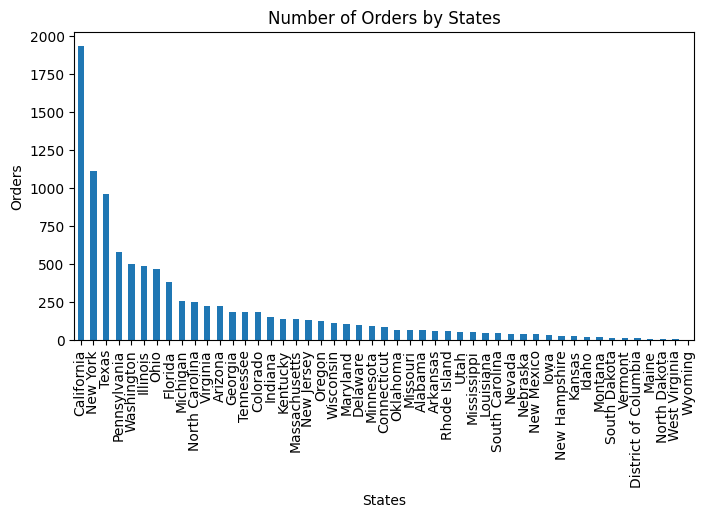

In [20]:
plt.figure(figsize=(8,4))
df['State'].value_counts().plot.bar()
plt.xlabel('States')
plt.ylabel('Orders')
plt.title('Number of Orders by States')
plt.show()


Segment wise Distribution of Orders

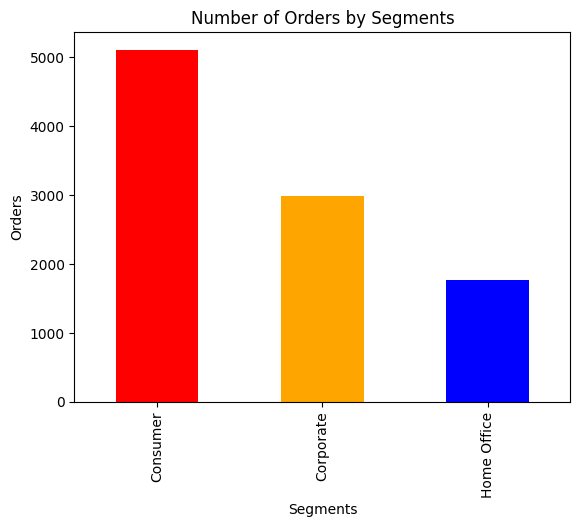

In [29]:
df['Segment'].value_counts().plot.bar(color = colors)
plt.xlabel('Segments')
plt.ylabel('Orders')
plt.title('Number of Orders by Segments')
plt.show()

Caterogry wise Distribution of Orders

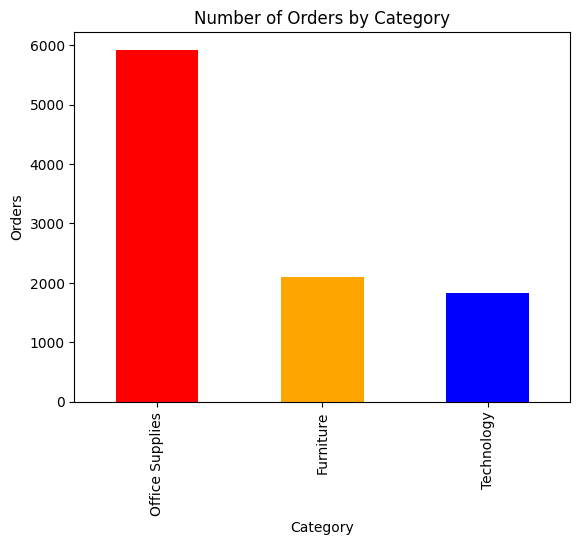

In [30]:
df['Category'].value_counts().plot.bar(color = colors)
plt.xlabel('Category')
plt.ylabel('Orders')
plt.title('Number of Orders by Category')
plt.show()

Pie Plot of Subcategories

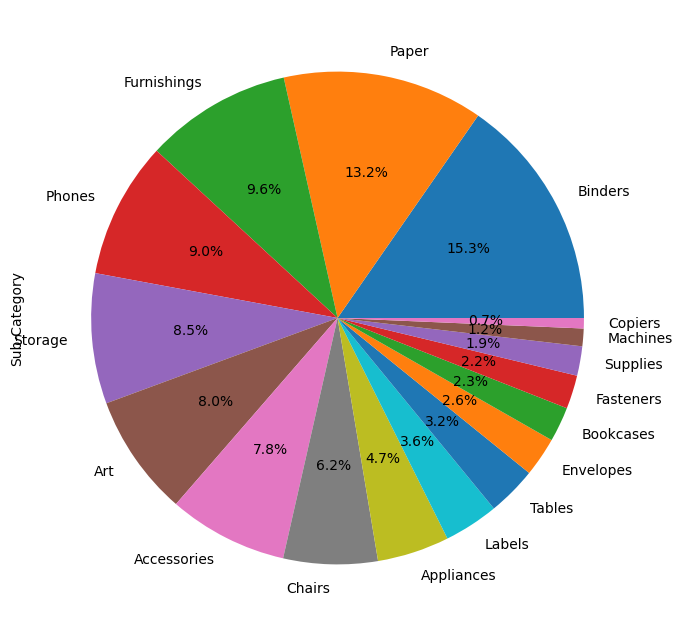

In [23]:
plt.figure(figsize=(8,8))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

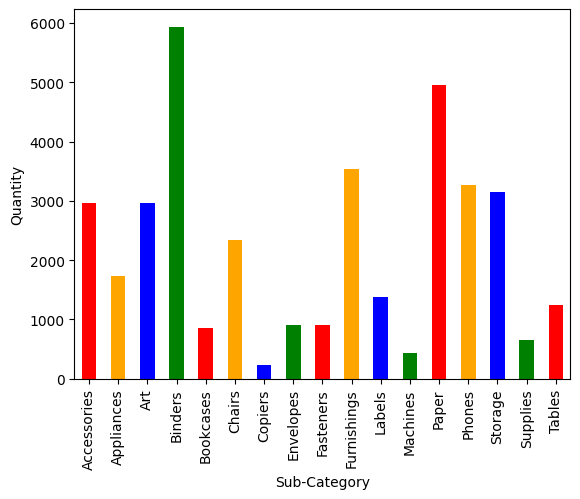

In [31]:
df.groupby('Sub-Category')["Quantity"].sum().plot.bar(color = colors)
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')
plt.show()


Profit and Sales of Each Segment and Category

<ipython-input-25-f270cab8991c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg('sum').plot.bar()


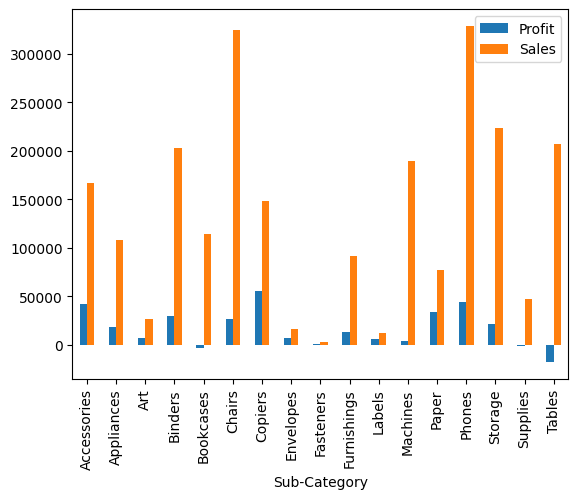

In [25]:
df.groupby('Sub-Category')['Profit','Sales'].agg('sum').plot.bar()
plt.show()

<ipython-input-26-135d45974d7b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Profit','Sales'].agg('sum').plot.bar()


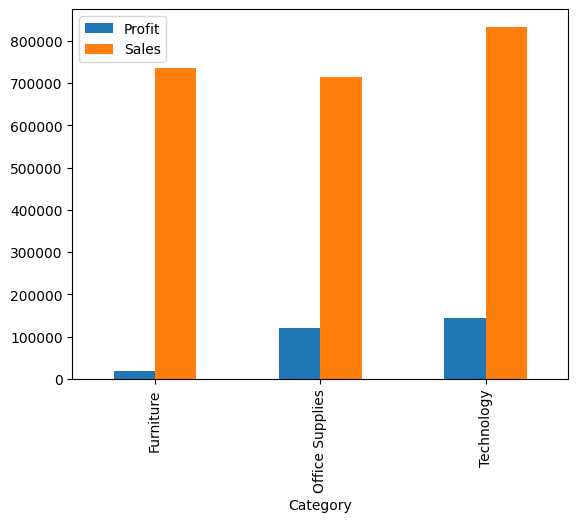

In [26]:
df.groupby('Category')['Profit','Sales'].agg('sum').plot.bar()
plt.show()

<ipython-input-27-80389fdb73ab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Segment')['Profit','Sales'].agg('sum').plot.bar()


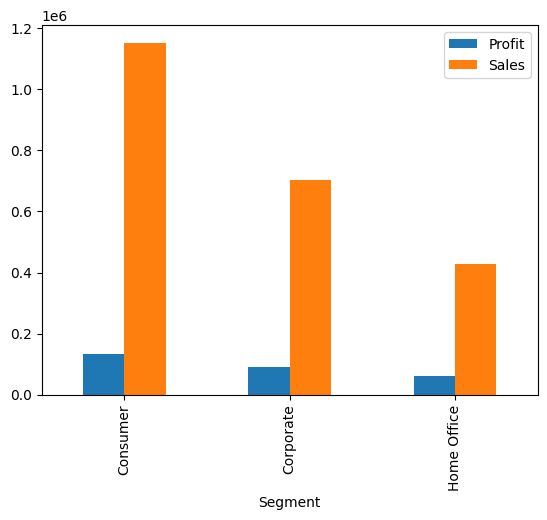

In [27]:
df.groupby('Segment')['Profit','Sales'].agg('sum').plot.bar()
plt.show()

# Profit vs Discounts
Less Discounts usually means more profit

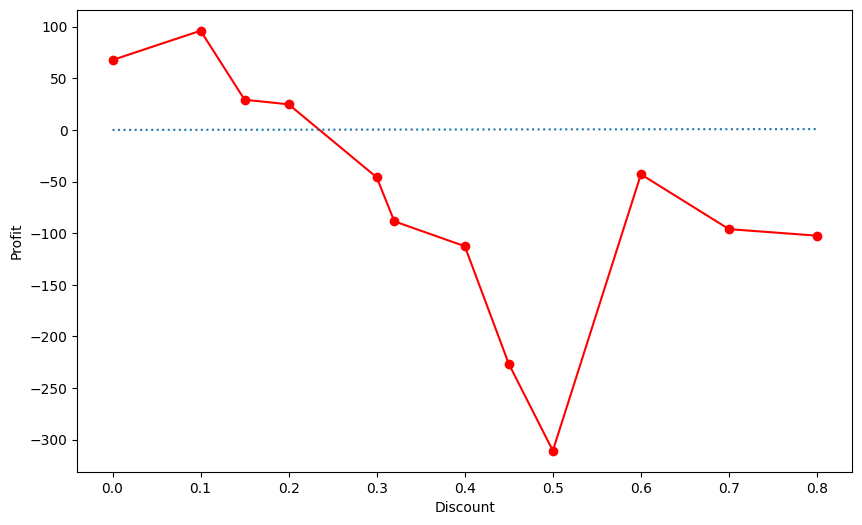

In [28]:
plt.figure(figsize=(10,6))
plt.xlabel("Discount")
plt.ylabel("Profit")
Average = df.groupby('Discount')['Profit'].mean()
Discountgroup = df.groupby('Discount')['Discount'].unique()
plt.plot(Average,color = 'red',marker = 'o')
plt.plot(Discountgroup,linestyle='dotted')
plt.show()

# Results

Company can reduce losses by Fixing Discount rates below 20%.

To Increase Profit Company can Increase cost of Furnitures Category because even though sales are high discounts add to Losses.

# Conclusions

1) Customers prefer the standard class shipment mode.

2) The West and East regions account for the majority of orders.

3) California, New York, and Texas have the highest number of orders.

4) The majority of orders belong to the Office Supplies category.

5) Binders, papers, storage, phones, and furnishings account for more than 50% of orders.

6) Accessories, copiers, and phones are the most profitable orders.

7) Chairs and phones are the most ordered items.

8) Technology and office supplies generate the majority of profit.

9) Sales are driven by consumers and corporations.

10) Orders with discounts greater than 25% result in losses.

